In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/jr0th/github/segmentation/code/')

import skimage.io
import skimage.morphology
import skimage.segmentation

import sklearn.metrics

import os.path
import os

import numpy as np

import time

debug = True

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
tag = "DL_on_Hand_8"

mo_data_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand/' + tag + '/segm/'
mat_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand/' + tag + '/IoU/'
err_img_out_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand/' + tag + '/error_img/'

In [3]:
gt_data_dir = '/home/jr0th/github/segmentation/experiments/GT_segmentations/'
path_files_test = '/home/jr0th/github/segmentation/data/BBBC022/test.txt'

In [4]:
with open(path_files_test) as f:
    test_files = f.read().splitlines()

In [5]:
def visualize(mat, seg_gt, seg_model):

    # get number of nuclei
    nb_nuc_gt = mat.shape[0]
    nb_nuc_model = mat.shape[1]
    
    if debug:
        print('# nuclei ground truth', nb_nuc_gt)
        print('# nuclei model', nb_nuc_model)
    
    # only allow assignments if IoU is at least 0.5
    detection_map = (mat > 0.5)
    nb_matches = np.sum(detection_map)
    detection_map_gt = np.sum(detection_map, 1)
    detection_map_model = np.sum(detection_map, 0)
    
    # mask with matches
    detection_rate = mat * detection_map
    
    nb_overdetection = nb_nuc_model - nb_matches
    nb_underdetection = nb_nuc_gt - nb_matches
    
    if debug:
        print('# matches', nb_matches)
        print('# overdetections', nb_overdetection)
        print('# underdetections', nb_underdetection)
        
    mean_IoU = np.mean(np.sum(detection_rate, axis = 1))
    
    if debug:
        print('# mean IoU', mean_IoU)
    
    # plot masked matrix
    plt.figure(figsize=(10,10))
    plt.matshow(detection_rate)
    plt.show()
    
    # get indices of mislabeled cells
    error_underdetected = np.nonzero(detection_map_gt == 0)[0] + 1
    error_overdetected = np.nonzero(detection_map_model == 0)[0] + 1

    # get empty buffer image
    error_img = np.zeros((seg_model.shape[0], seg_model.shape[1], 3), dtype = np.ubyte)

    # color image
    brownish = [172, 128, 0]
    blueish = [31, 190, 214]
    for error in error_underdetected:
        # brownish: underdetected
        error_img[seg_gt == error, :] = brownish
    for error in error_overdetected:
        # blueish: overdetected
        error_img[seg_model == error, :] = error_img[seg_model == error, :] + blueish
        
    # pixels where under- and overdetection occured appear in pink
    
    return error_img

    

# nuclei ground truth 51
# nuclei model 48
# matches 39
# overdetections 9
# underdetections 12
# mean IoU 0.422378


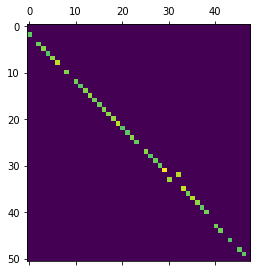

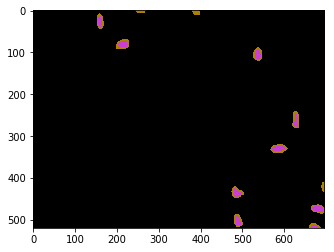

# nuclei ground truth 84
# nuclei model 79
# matches 63
# overdetections 16
# underdetections 21
# mean IoU 0.425551


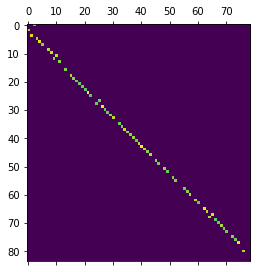

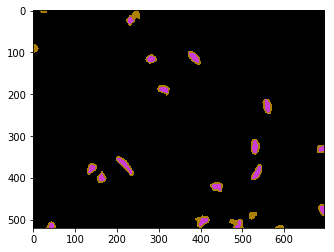

# nuclei ground truth 77
# nuclei model 66
# matches 33
# overdetections 33
# underdetections 44
# mean IoU 0.240913


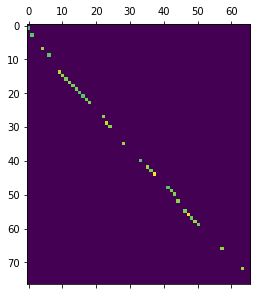

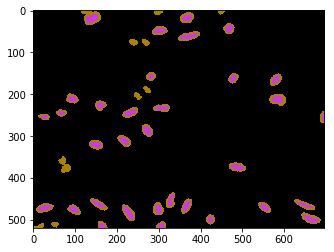

# nuclei ground truth 97
# nuclei model 89
# matches 72
# overdetections 17
# underdetections 25
# mean IoU 0.426849


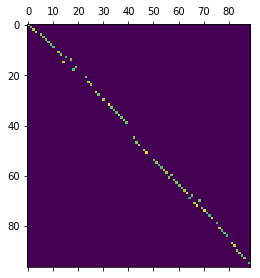

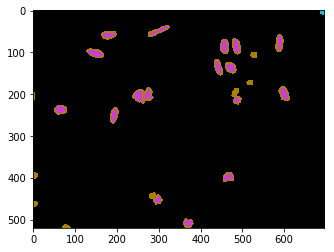

# nuclei ground truth 44
# nuclei model 41
# matches 30
# overdetections 11
# underdetections 14
# mean IoU 0.406079


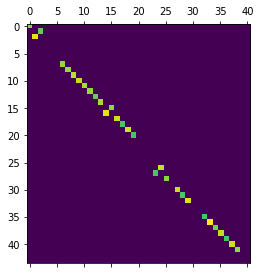

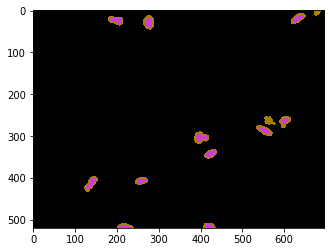

# nuclei ground truth 87
# nuclei model 84
# matches 61
# overdetections 23
# underdetections 26
# mean IoU 0.392037


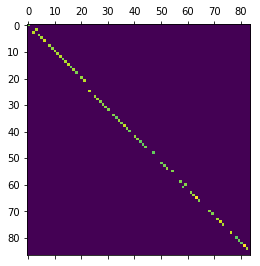

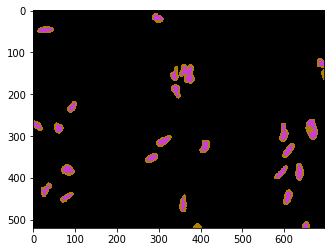

# nuclei ground truth 69
# nuclei model 66
# matches 54
# overdetections 12
# underdetections 15
# mean IoU 0.453738


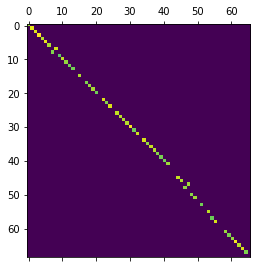

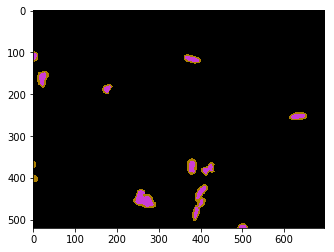

# nuclei ground truth 74
# nuclei model 71
# matches 44
# overdetections 27
# underdetections 30
# mean IoU 0.331257


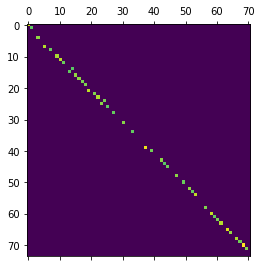

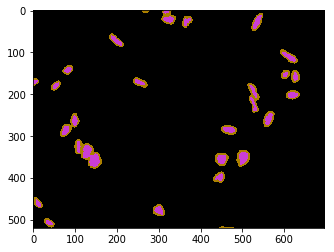

# nuclei ground truth 25
# nuclei model 17
# matches 8
# overdetections 9
# underdetections 17
# mean IoU 0.179871


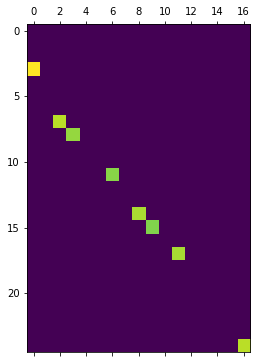

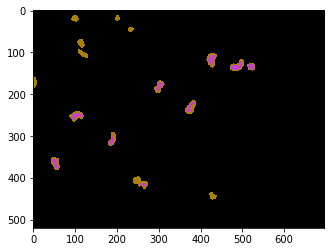

# nuclei ground truth 138
# nuclei model 132
# matches 90
# overdetections 42
# underdetections 48
# mean IoU 0.363219


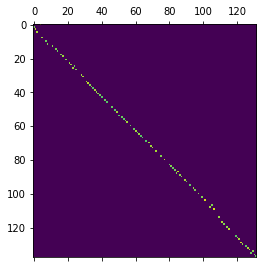

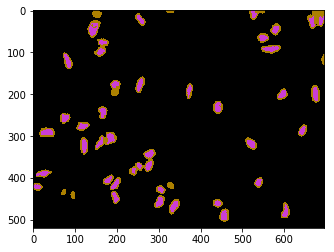

# nuclei ground truth 84
# nuclei model 82
# matches 54
# overdetections 28
# underdetections 30
# mean IoU 0.360123


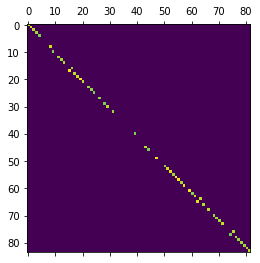

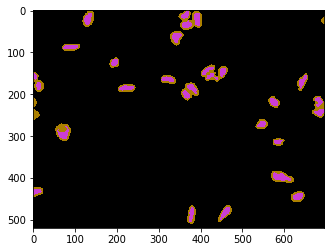

# nuclei ground truth 113
# nuclei model 107
# matches 78
# overdetections 29
# underdetections 35
# mean IoU 0.386104


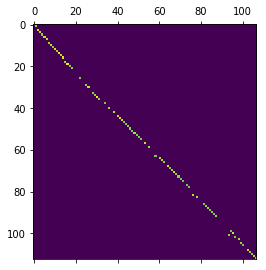

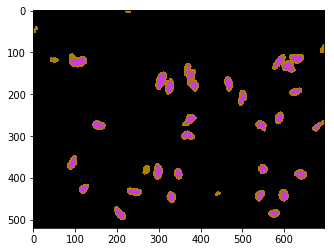

# nuclei ground truth 142
# nuclei model 137
# matches 88
# overdetections 49
# underdetections 54
# mean IoU 0.341778


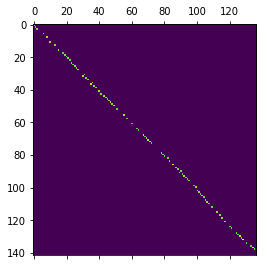

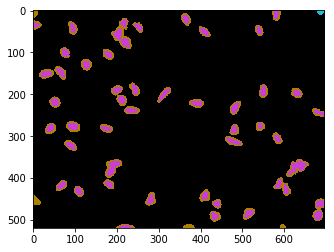

# nuclei ground truth 184
# nuclei model 167
# matches 114
# overdetections 53
# underdetections 70
# mean IoU 0.348339


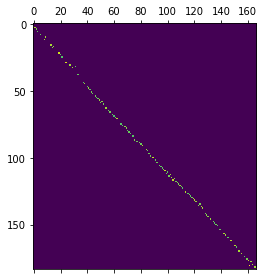

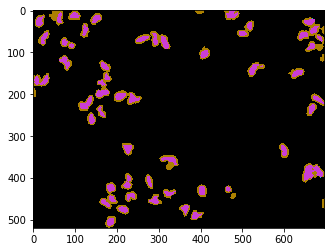

# nuclei ground truth 179
# nuclei model 159
# matches 96
# overdetections 63
# underdetections 83
# mean IoU 0.293329


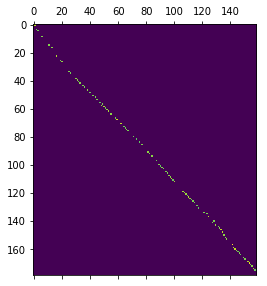

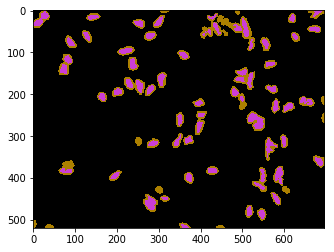

# nuclei ground truth 141
# nuclei model 128
# matches 74
# overdetections 54
# underdetections 67
# mean IoU 0.301199


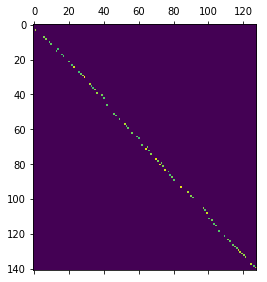

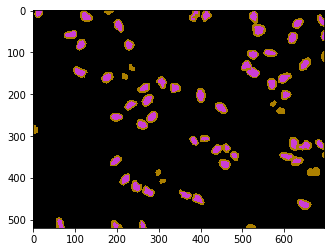

# nuclei ground truth 132
# nuclei model 124
# matches 96
# overdetections 28
# underdetections 36
# mean IoU 0.40913


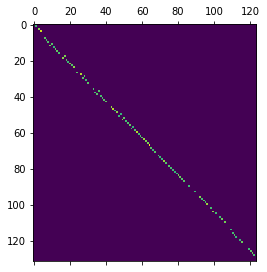

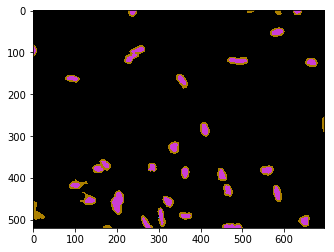

# nuclei ground truth 128
# nuclei model 123
# matches 96
# overdetections 27
# underdetections 32
# mean IoU 0.417158


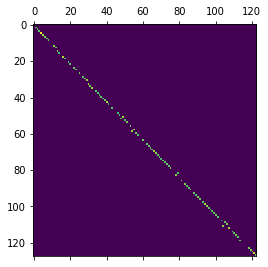

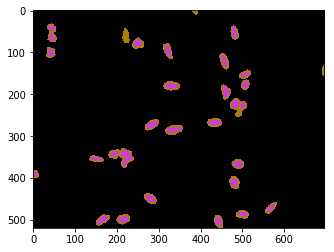

# nuclei ground truth 105
# nuclei model 89
# matches 63
# overdetections 26
# underdetections 42
# mean IoU 0.344276


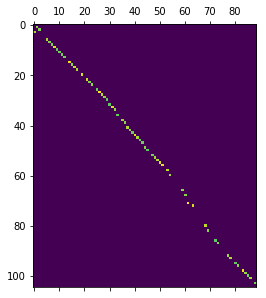

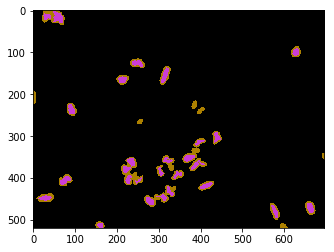

# nuclei ground truth 95
# nuclei model 94
# matches 69
# overdetections 25
# underdetections 26
# mean IoU 0.413506


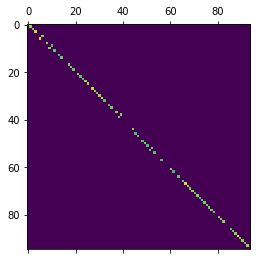

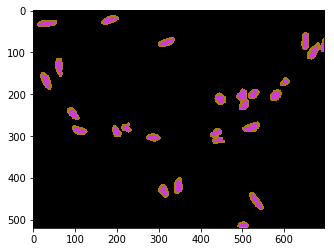

# nuclei ground truth 76
# nuclei model 73
# matches 37
# overdetections 36
# underdetections 39
# mean IoU 0.280105


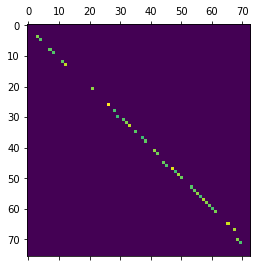

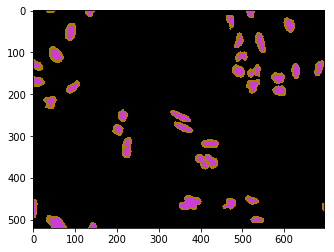

# nuclei ground truth 136
# nuclei model 129
# matches 85
# overdetections 44
# underdetections 51
# mean IoU 0.342669


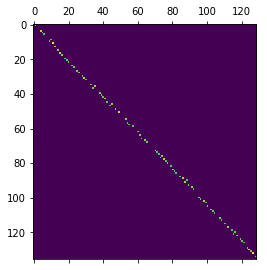

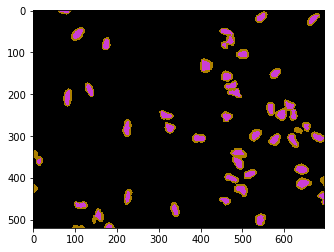

# nuclei ground truth 34
# nuclei model 32
# matches 19
# overdetections 13
# underdetections 15
# mean IoU 0.305064


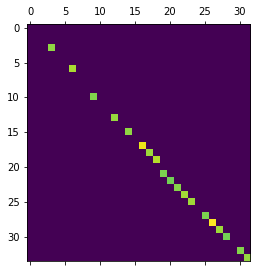

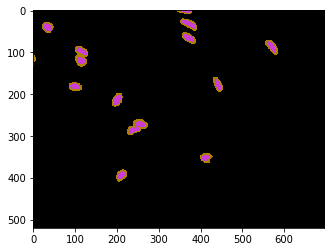

# nuclei ground truth 124
# nuclei model 115
# matches 65
# overdetections 50
# underdetections 59
# mean IoU 0.292187


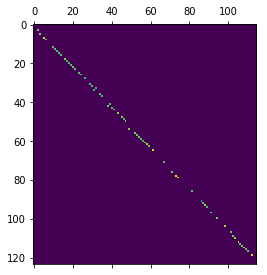

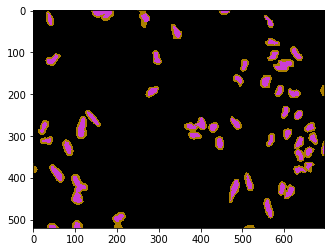

# nuclei ground truth 138
# nuclei model 126
# matches 78
# overdetections 48
# underdetections 60
# mean IoU 0.308058


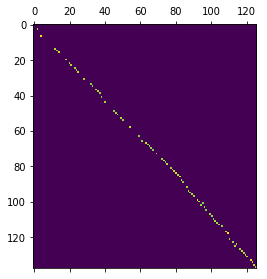

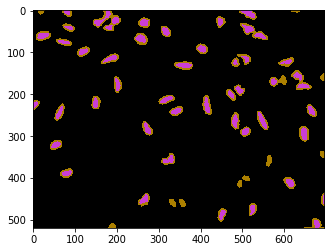

# nuclei ground truth 197
# nuclei model 178
# matches 106
# overdetections 72
# underdetections 91
# mean IoU 0.299157


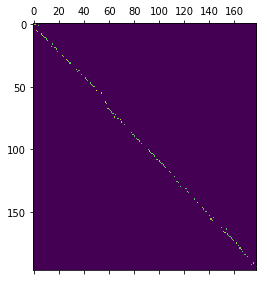

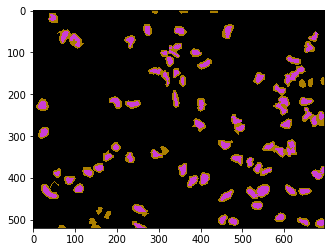

# nuclei ground truth 126
# nuclei model 116
# matches 80
# overdetections 36
# underdetections 46
# mean IoU 0.358527


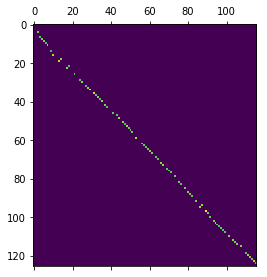

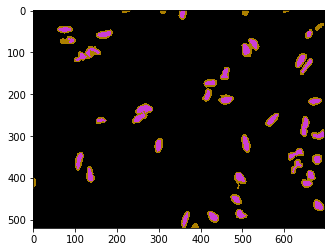

# nuclei ground truth 117
# nuclei model 111
# matches 80
# overdetections 31
# underdetections 37
# mean IoU 0.384902


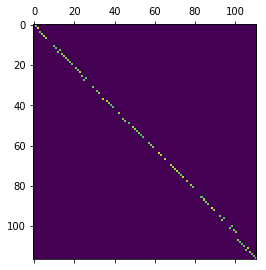

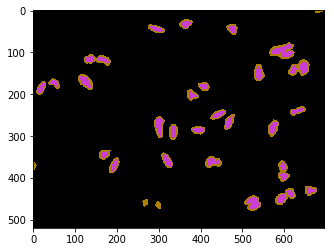

# nuclei ground truth 79
# nuclei model 76
# matches 52
# overdetections 24
# underdetections 27
# mean IoU 0.3628


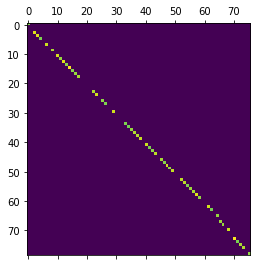

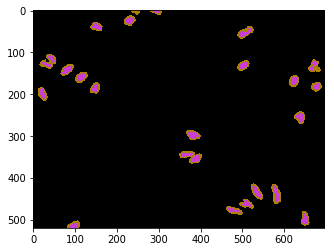

# nuclei ground truth 112
# nuclei model 107
# matches 71
# overdetections 36
# underdetections 41
# mean IoU 0.365155


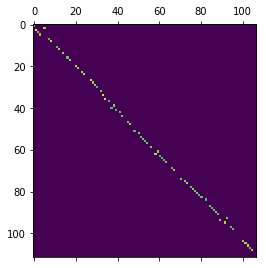

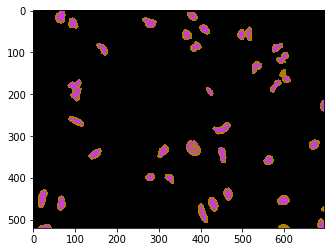

# nuclei ground truth 7
# nuclei model 7
# matches 4
# overdetections 3
# underdetections 3
# mean IoU 0.301045


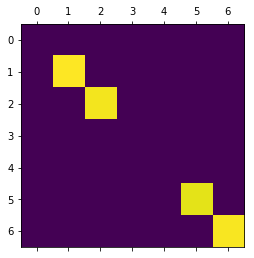

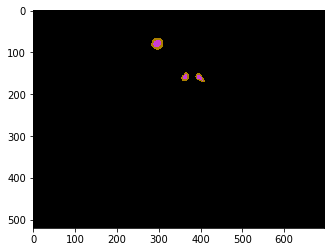

# nuclei ground truth 58
# nuclei model 51
# matches 29
# overdetections 22
# underdetections 29
# mean IoU 0.274084


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand/DL_on_Hand_8/error_img/IXMtest_F12_s8_w1DBD80811-5297-4415-ACD1-EC9286BE76A4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


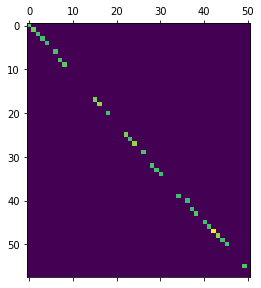

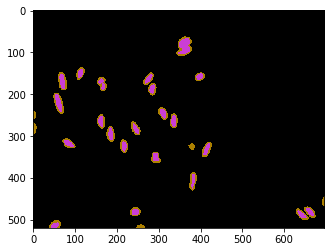

# nuclei ground truth 101
# nuclei model 94
# matches 72
# overdetections 22
# underdetections 29
# mean IoU 0.400259


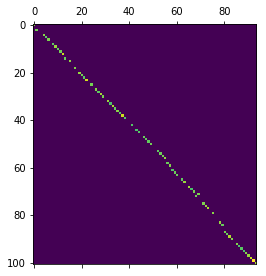

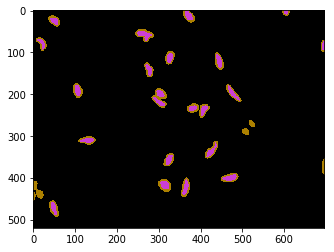

# nuclei ground truth 131
# nuclei model 124
# matches 97
# overdetections 27
# underdetections 34
# mean IoU 0.422834


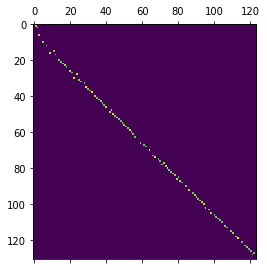

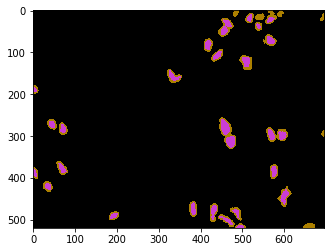

# nuclei ground truth 152
# nuclei model 144
# matches 104
# overdetections 40
# underdetections 48
# mean IoU 0.386411


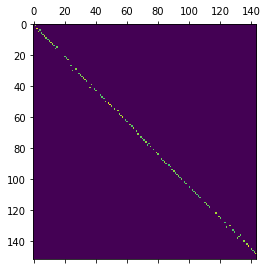

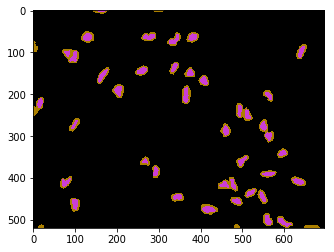

# nuclei ground truth 160
# nuclei model 156
# matches 113
# overdetections 43
# underdetections 47
# mean IoU 0.400375


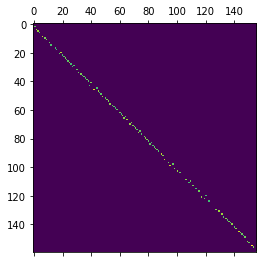

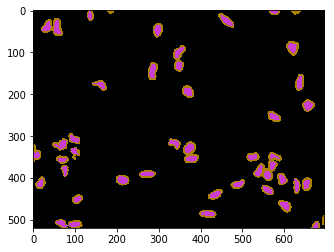

# nuclei ground truth 134
# nuclei model 124
# matches 83
# overdetections 41
# underdetections 51
# mean IoU 0.345088


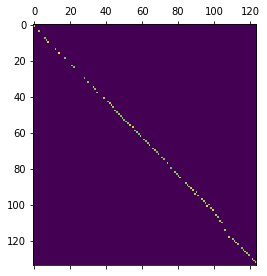

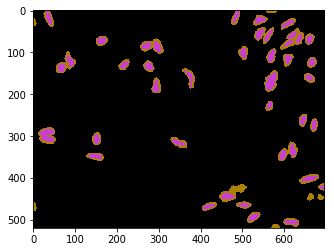

# nuclei ground truth 35
# nuclei model 30
# matches 16
# overdetections 14
# underdetections 19
# mean IoU 0.25932


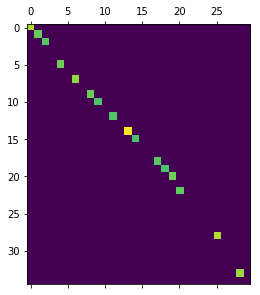

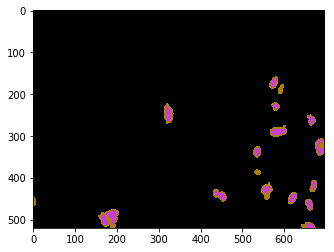

# nuclei ground truth 151
# nuclei model 140
# matches 83
# overdetections 57
# underdetections 68
# mean IoU 0.310844


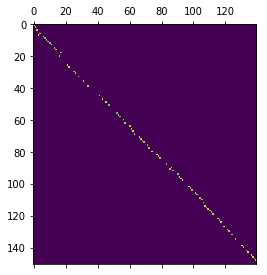

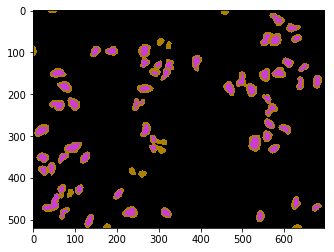

# nuclei ground truth 95
# nuclei model 89
# matches 56
# overdetections 33
# underdetections 39
# mean IoU 0.325007


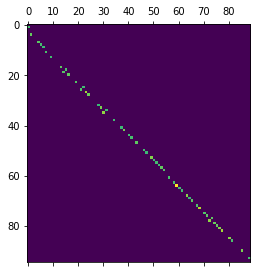

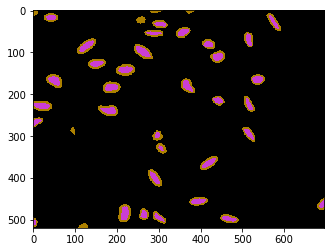

# nuclei ground truth 109
# nuclei model 95
# matches 75
# overdetections 20
# underdetections 34
# mean IoU 0.386834


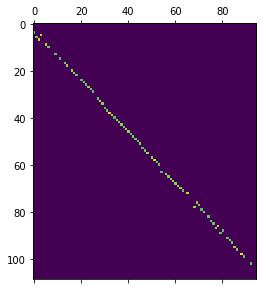

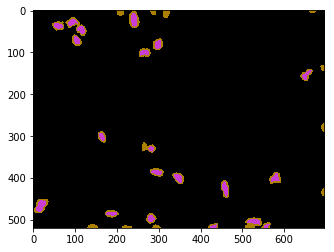

# nuclei ground truth 124
# nuclei model 119
# matches 97
# overdetections 22
# underdetections 27
# mean IoU 0.437431


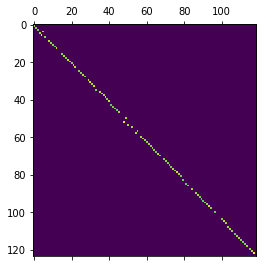

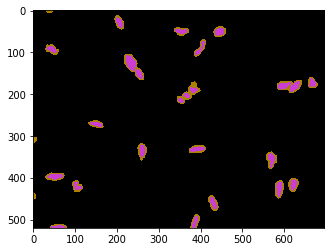

# nuclei ground truth 145
# nuclei model 139
# matches 85
# overdetections 54
# underdetections 60
# mean IoU 0.325322


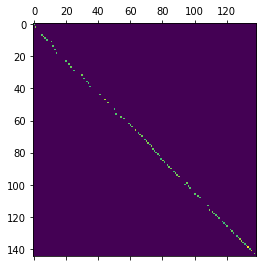

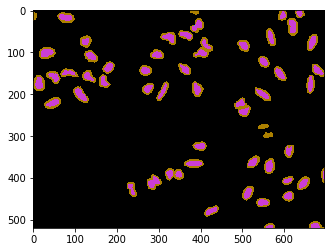

# nuclei ground truth 108
# nuclei model 101
# matches 83
# overdetections 18
# underdetections 25
# mean IoU 0.439807


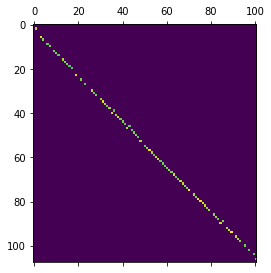

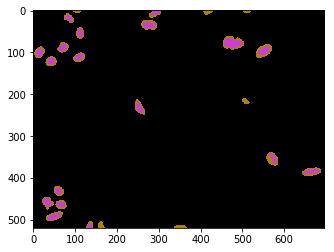

# nuclei ground truth 109
# nuclei model 106
# matches 72
# overdetections 34
# underdetections 37
# mean IoU 0.363094


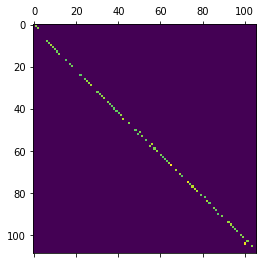

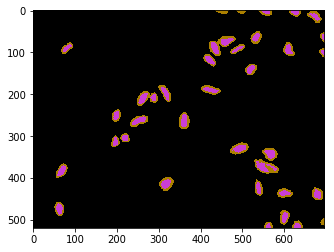

# nuclei ground truth 61
# nuclei model 58
# matches 50
# overdetections 8
# underdetections 11
# mean IoU 0.475488


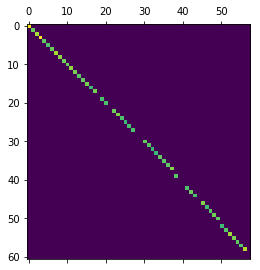

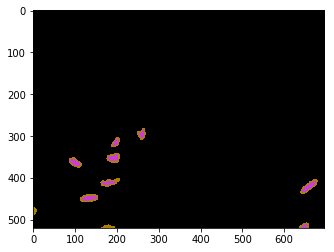

# nuclei ground truth 88
# nuclei model 81
# matches 49
# overdetections 32
# underdetections 39
# mean IoU 0.321965


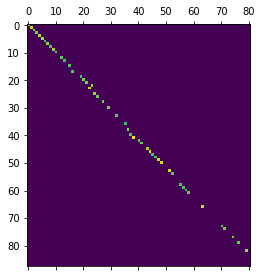

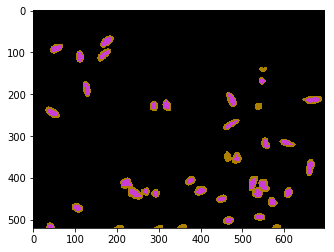

# nuclei ground truth 86
# nuclei model 85
# matches 58
# overdetections 27
# underdetections 28
# mean IoU 0.391819


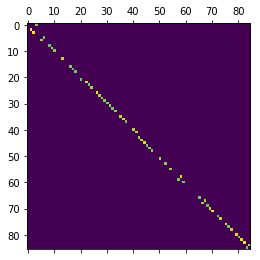

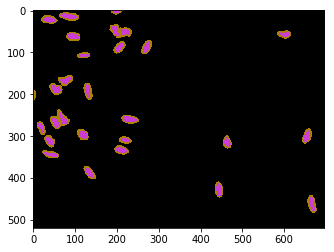

# nuclei ground truth 19
# nuclei model 17
# matches 10
# overdetections 7
# underdetections 9
# mean IoU 0.305925


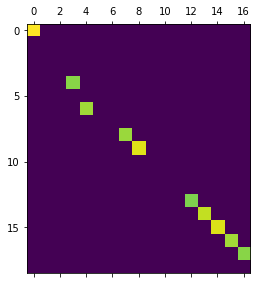

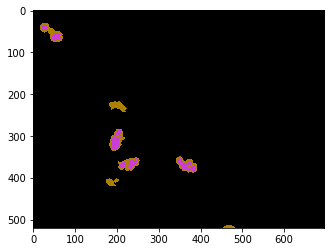

# nuclei ground truth 149
# nuclei model 145
# matches 76
# overdetections 69
# underdetections 73
# mean IoU 0.283435


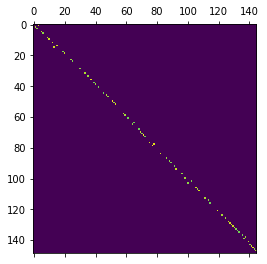

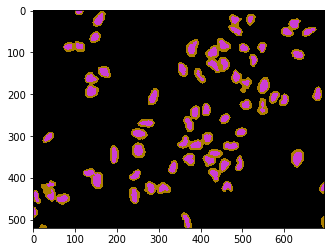

In [6]:
for filename in test_files:
    
    filename_wo_ext = os.path.splitext(filename)[0]
    
    # load error matrices
    IoU = np.load(mat_dir + filename_wo_ext + '.npy')

    # load segmentations
    seg_gt = skimage.io.imread(gt_data_dir + filename)
    seg_mo = skimage.io.imread(mo_data_dir + filename)
    
    # visualize only if matrices are full (no empty images and some detection)
    if(IoU.size != 0):
        error_img = visualize(IoU, seg_gt, seg_mo)
        plt.imshow(error_img)
        plt.show()
        skimage.io.imsave(err_img_out_dir + filename, error_img)
        